In [1]:
#record video and audio simultaniously
import pyaudio
import wave
import threading
import time
import subprocess
import cv2
import numpy as np
import os

In [2]:
#record audio
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "tmp.wav"

class recorder:
    def __init__(self):
        self.going = False
        self.process = None
        self.filename = "ScreenCapture.mpg"
    def record(self,filename):
        try:
            if self.process.is_alive():
                self.going = False
        except AttributeError:
            print("test")
        self.process = threading.Thread(target=self._record)
        self.process.start()
        self.filename = filename
    def _record(self):
        p = pyaudio.PyAudio()
        stream = p.open(format=FORMAT,
                        channels=CHANNELS,
                        rate=RATE,
                        input=True,
                        frames_per_buffer=CHUNK)

        print("* recording")

        frames = []

        self.going = True
        
        while self.going:
            data = stream.read(CHUNK)
            frames.append(data)

        print("* done recording")

        stream.stop_stream()
        stream.close()
        p.terminate()

        wf = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(p.get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(b''.join(frames))
        wf.close()
        

    def stop_recording(self):
        self.going = False

In [3]:
#record video and audio
def RecordVideo():
    if os.path.exists('output.avi'):
        print("video exists")
        os.remove('output.avi')
    
    if os.path.exists('tmp.wav'):
        print("audio exists")
        os.remove('tmp.wav')
        
    cap = cv2.VideoCapture(0)

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
    audio = recorder()
    audio.record(audio.filename)
    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            frame = cv2.flip(frame,100)
            # write the flipped frame
            out.write(frame)
            cv2.imshow('frame',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    # Release everything if job is finished
    audio.stop_recording()
    cap.release()
    out.release()
    cv2.destroyAllWindows()

In [4]:
RecordVideo()

video exists
audio exists
test
* recording
* done recording


In [5]:
def ConverteToImages():
    videoobj = cv2.VideoCapture("output.avi")
        # Used as counter variable 
    count = 0
    # checks whether frames were extracted 
    success = 1
  
    while success: 
  
        # vidObj object calls read 
        # function extract frames 
        success, image = videoobj.read() 
  
        # Saves the frames with frame-count 
        cv2.imwrite("Images/frame%d.jpg" % count, image) 
  
        count += 1

In [6]:
ConverteToImages()

In [7]:
class FaceCropper(object):
    CASCADE_PATH = "haarcascade_frontalface_default.xml"

    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(self.CASCADE_PATH)

    def generate(self, image_path,i):
        img = cv2.imread(image_path)
        if (img is None):
            print("Can't open image file")
            return 0

        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(img, 1.1, 3, minSize=(100, 100))
        if (faces is None):
            return 0

        facecnt = len(faces)
        if facecnt is 0:
            return i
        height, width = img.shape[:2]

        for (x, y, w, h) in faces:
            r = max(w, h) / 2
            centerx = x + w / 2
            centery = y + h / 2
            nx = int(centerx - r)
            ny = int(centery - r)
            nr = int(r * 2)

            faceimg = img[ny:ny+nr, nx:nx+nr]
            lastimg = cv2.resize(faceimg, (96, 96))
            i += 1
            cv2.imwrite("faces/image%d.jpg" % i, lastimg)
        return i

In [8]:
from tqdm import tqdm
FOLDER_NAME="Images"
IMAGE_INDEX=1
detecter = FaceCropper()
for file in tqdm(os.listdir(FOLDER_NAME)):
    image = os.path.join(FOLDER_NAME,file)
    IMAGE_INDEX = detecter.generate(image,IMAGE_INDEX)

 19%|█▉        | 51/265 [00:00<00:03, 56.23it/s]

Can't open image file


100%|██████████| 265/265 [00:05<00:00, 47.82it/s]


In [9]:
#Converte Audio to text

In [10]:
import speech_recognition as sr

r = sr.Recognizer()
with sr.AudioFile("ENG_M.wav") as source:
    audio = r.record(source)  # read the entire audio file

data = r.recognize_google(audio)

In [ ]:
print(data)

In [11]:
#facial kypoint detection

In [12]:
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from keras import optimizers
#5-layerleNet

model2 = Sequential()
# input layer
model2.add(BatchNormalization(input_shape=(96, 96,1)))
model2.add(Conv2D(16, (3, 3), kernel_initializer='he_normal'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# layer 2
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# layer 3
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# layer 4
model2.add(Conv2D(128, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# layer 5
model2.add(Conv2D(256, (3, 3)))
model2.add(Activation('relu'))
model2.add(Flatten())
# layer 6
model2.add(Dense(500, activation="relu"))
# layer 7
model2.add(Dense(500, activation="relu"))
# layer 8
model2.add(Dense(500, activation="relu"))
# layer 9
model2.add(Dense(500, activation="relu"))
# layer 10
model2.add(Dense(30))

Using TensorFlow backend.


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
model2.load_weights("FacialKeyPoints-model2")
import pandas as pd
train_dataset = pd.read_csv("../../Finished/facial keypoint/all (1)/training.csv")
train_dataset_optimzed = train_dataset.dropna()
y = np.vstack(train_dataset_optimzed[train_dataset_optimzed.columns[:-1]].values)

output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(y)

In [14]:
import matplotlib.pyplot as plt
def markfacialKeyPoints():
    FACE_DIR = "faces/"
    FACEPOINTS_DIR = "FaceWithKeyPoints/"
    for image in tqdm(os.listdir(FACE_DIR)):
        try: 
            facepath = os.path.join(FACE_DIR,image)
            img = cv2.imread(facepath)
            gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            gray_image = gray_image/255
            out = gray_image[np.newaxis, :, :, np.newaxis]
            predictions = model2.predict(out)
            xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
            plt.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'rs')
            plt.imshow(gray_image, cmap='gray')
            finaloutput = os.path.join(FACEPOINTS_DIR,image)
            print(finaloutput)
            plt.savefig(finaloutput)
        except:
            print(image)
            print("error")

  1%|          | 1/90 [00:00<00:17,  5.22it/s]

FaceWithKeyPoints/image33.jpg
FaceWithKeyPoints/image79.jpg
FaceWithKeyPoints/image25.jpg


  6%|▌         | 5/90 [00:00<00:08,  9.52it/s]

FaceWithKeyPoints/image42.jpg
FaceWithKeyPoints/image1.jpg
FaceWithKeyPoints/image9.jpg


  9%|▉         | 8/90 [00:00<00:08,  9.36it/s]

FaceWithKeyPoints/image19.jpg
FaceWithKeyPoints/image85.jpg


 10%|█         | 9/90 [00:00<00:08,  9.04it/s]

FaceWithKeyPoints/image32.jpg
FaceWithKeyPoints/image48.jpg


 12%|█▏        | 11/90 [00:01<00:09,  8.67it/s]

FaceWithKeyPoints/image28.jpg
FaceWithKeyPoints/image40.jpg


 14%|█▍        | 13/90 [00:01<00:09,  8.40it/s]

FaceWithKeyPoints/image76.jpg
FaceWithKeyPoints/image30.jpg


 17%|█▋        | 15/90 [00:01<00:09,  8.00it/s]

FaceWithKeyPoints/image57.jpg
FaceWithKeyPoints/image10.jpg


 19%|█▉        | 17/90 [00:02<00:09,  7.61it/s]

FaceWithKeyPoints/image56.jpg
FaceWithKeyPoints/image59.jpg


 21%|██        | 19/90 [00:02<00:09,  7.33it/s]

FaceWithKeyPoints/image70.jpg
FaceWithKeyPoints/image84.jpg


 23%|██▎       | 21/90 [00:02<00:09,  7.15it/s]

FaceWithKeyPoints/image53.jpg
FaceWithKeyPoints/image41.jpg


 26%|██▌       | 23/90 [00:03<00:09,  6.87it/s]

FaceWithKeyPoints/image50.jpg
FaceWithKeyPoints/image35.jpg


 28%|██▊       | 25/90 [00:03<00:09,  6.61it/s]

FaceWithKeyPoints/image67.jpg
FaceWithKeyPoints/image78.jpg


 29%|██▉       | 26/90 [00:04<00:09,  6.50it/s]

FaceWithKeyPoints/image2.jpg


 30%|███       | 27/90 [00:04<00:09,  6.35it/s]

FaceWithKeyPoints/image77.jpg


 31%|███       | 28/90 [00:04<00:09,  6.23it/s]

FaceWithKeyPoints/image18.jpg


 32%|███▏      | 29/90 [00:04<00:09,  6.14it/s]

FaceWithKeyPoints/image61.jpg


 33%|███▎      | 30/90 [00:04<00:09,  6.04it/s]

FaceWithKeyPoints/image26.jpg


 34%|███▍      | 31/90 [00:05<00:09,  5.93it/s]

FaceWithKeyPoints/image89.jpg


 36%|███▌      | 32/90 [00:05<00:09,  5.82it/s]

FaceWithKeyPoints/image23.jpg


 37%|███▋      | 33/90 [00:05<00:09,  5.71it/s]

FaceWithKeyPoints/image75.jpg


 38%|███▊      | 34/90 [00:06<00:09,  5.62it/s]

FaceWithKeyPoints/image47.jpg


 39%|███▉      | 35/90 [00:06<00:09,  5.52it/s]

FaceWithKeyPoints/image46.jpg


 40%|████      | 36/90 [00:06<00:09,  5.46it/s]

FaceWithKeyPoints/image22.jpg


 41%|████      | 37/90 [00:06<00:09,  5.36it/s]

FaceWithKeyPoints/image36.jpg


 42%|████▏     | 38/90 [00:07<00:09,  5.27it/s]

FaceWithKeyPoints/image71.jpg


 43%|████▎     | 39/90 [00:07<00:09,  5.19it/s]

FaceWithKeyPoints/image72.jpg


 44%|████▍     | 40/90 [00:07<00:09,  5.11it/s]

FaceWithKeyPoints/image34.jpg


 46%|████▌     | 41/90 [00:08<00:09,  5.03it/s]

FaceWithKeyPoints/image44.jpg


 47%|████▋     | 42/90 [00:08<00:09,  4.96it/s]

FaceWithKeyPoints/image80.jpg


 48%|████▊     | 43/90 [00:08<00:09,  4.90it/s]

FaceWithKeyPoints/image27.jpg


 49%|████▉     | 44/90 [00:09<00:09,  4.84it/s]

FaceWithKeyPoints/image14.jpg


 50%|█████     | 45/90 [00:09<00:09,  4.78it/s]

FaceWithKeyPoints/image43.jpg


 51%|█████     | 46/90 [00:09<00:09,  4.72it/s]

FaceWithKeyPoints/image73.jpg


 52%|█████▏    | 47/90 [00:10<00:09,  4.68it/s]

FaceWithKeyPoints/image17.jpg


 53%|█████▎    | 48/90 [00:10<00:09,  4.63it/s]

FaceWithKeyPoints/image66.jpg


 54%|█████▍    | 49/90 [00:10<00:08,  4.58it/s]

FaceWithKeyPoints/image62.jpg


 56%|█████▌    | 50/90 [00:11<00:08,  4.53it/s]

FaceWithKeyPoints/image37.jpg


 57%|█████▋    | 51/90 [00:11<00:08,  4.47it/s]

FaceWithKeyPoints/image68.jpg


 58%|█████▊    | 52/90 [00:11<00:08,  4.42it/s]

FaceWithKeyPoints/image11.jpg


 59%|█████▉    | 53/90 [00:12<00:08,  4.37it/s]

FaceWithKeyPoints/image6.jpg


 60%|██████    | 54/90 [00:12<00:08,  4.32it/s]

FaceWithKeyPoints/image45.jpg


 61%|██████    | 55/90 [00:12<00:08,  4.27it/s]

FaceWithKeyPoints/image81.jpg


 62%|██████▏   | 56/90 [00:13<00:08,  4.22it/s]

FaceWithKeyPoints/image65.jpg


 63%|██████▎   | 57/90 [00:13<00:07,  4.18it/s]

FaceWithKeyPoints/image39.jpg


 64%|██████▍   | 58/90 [00:13<00:07,  4.15it/s]

FaceWithKeyPoints/image87.jpg


 66%|██████▌   | 59/90 [00:14<00:07,  4.11it/s]

FaceWithKeyPoints/image24.jpg


 67%|██████▋   | 60/90 [00:14<00:07,  4.03it/s]

FaceWithKeyPoints/image69.jpg


 68%|██████▊   | 61/90 [00:15<00:07,  3.99it/s]

FaceWithKeyPoints/image13.jpg


 69%|██████▉   | 62/90 [00:15<00:07,  3.90it/s]

FaceWithKeyPoints/image8.jpg


 70%|███████   | 63/90 [00:16<00:07,  3.86it/s]

FaceWithKeyPoints/image90.jpg


 71%|███████   | 64/90 [00:16<00:06,  3.78it/s]

FaceWithKeyPoints/image20.jpg


 72%|███████▏  | 65/90 [00:17<00:06,  3.75it/s]

FaceWithKeyPoints/image15.jpg


 73%|███████▎  | 66/90 [00:17<00:06,  3.69it/s]

FaceWithKeyPoints/image64.jpg


 74%|███████▍  | 67/90 [00:18<00:06,  3.66it/s]

FaceWithKeyPoints/image88.jpg


 76%|███████▌  | 68/90 [00:18<00:06,  3.63it/s]

FaceWithKeyPoints/image51.jpg


 77%|███████▋  | 69/90 [00:19<00:05,  3.57it/s]

FaceWithKeyPoints/image60.jpg


 78%|███████▊  | 70/90 [00:19<00:05,  3.52it/s]

FaceWithKeyPoints/image7.jpg


 79%|███████▉  | 71/90 [00:20<00:05,  3.48it/s]

FaceWithKeyPoints/image83.jpg


 80%|████████  | 72/90 [00:20<00:05,  3.44it/s]

FaceWithKeyPoints/image21.jpg


 81%|████████  | 73/90 [00:21<00:04,  3.40it/s]

FaceWithKeyPoints/image16.jpg


 82%|████████▏ | 74/90 [00:21<00:04,  3.37it/s]

FaceWithKeyPoints/image12.jpg


 83%|████████▎ | 75/90 [00:22<00:04,  3.30it/s]

FaceWithKeyPoints/image82.jpg


 84%|████████▍ | 76/90 [00:23<00:04,  3.28it/s]

FaceWithKeyPoints/image38.jpg


 86%|████████▌ | 77/90 [00:23<00:03,  3.26it/s]

FaceWithKeyPoints/image58.jpg


 87%|████████▋ | 78/90 [00:24<00:03,  3.22it/s]

FaceWithKeyPoints/image4.jpg


 88%|████████▊ | 79/90 [00:24<00:03,  3.18it/s]

FaceWithKeyPoints/image74.jpg


 89%|████████▉ | 80/90 [00:25<00:03,  3.15it/s]

FaceWithKeyPoints/image49.jpg


 90%|█████████ | 81/90 [00:25<00:02,  3.12it/s]

FaceWithKeyPoints/image54.jpg


 91%|█████████ | 82/90 [00:26<00:02,  3.08it/s]

FaceWithKeyPoints/image3.jpg


 92%|█████████▏| 83/90 [00:27<00:02,  3.06it/s]

FaceWithKeyPoints/image55.jpg


 93%|█████████▎| 84/90 [00:27<00:01,  3.02it/s]

FaceWithKeyPoints/image86.jpg


 94%|█████████▍| 85/90 [00:28<00:01,  2.99it/s]

FaceWithKeyPoints/image29.jpg


 96%|█████████▌| 86/90 [00:29<00:01,  2.96it/s]

FaceWithKeyPoints/image31.jpg


 97%|█████████▋| 87/90 [00:29<00:01,  2.94it/s]

FaceWithKeyPoints/image52.jpg


 98%|█████████▊| 88/90 [00:30<00:00,  2.90it/s]

FaceWithKeyPoints/image63.jpg


 99%|█████████▉| 89/90 [00:30<00:00,  2.88it/s]

FaceWithKeyPoints/image5.jpg


100%|██████████| 90/90 [00:31<00:00,  2.86it/s]


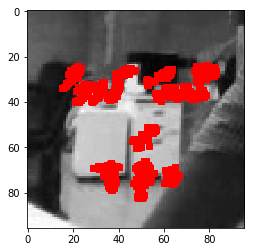

In [15]:
markfacialKeyPoints()

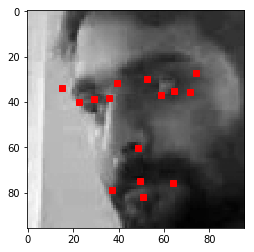

In [21]:
import matplotlib.pyplot as plt
img = cv2.imread("faces/image15.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image = gray_image/255
out = gray_image[np.newaxis, :, :, np.newaxis]
predictions = model2.predict(out)
xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
#ax.imshow(img, cmap='gray')
#ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'bo')
#ax.axis('off')
plt.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'rs')
plt.imshow(gray_image, cmap='gray')

In [22]:
input_shape = (48, 48, 3)

model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same',
           activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    Conv2D(256, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    Conv2D(512, (3, 3), activation='relu', padding='same',),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(7, activation='softmax')
])

In [24]:
img = cv2.imread("faces/image15.jpg")
lastimg = cv2.resize(img, (48, 48))
gray_image = lastimg/255
out = gray_image[np.newaxis, :, :]
model.load_weights("Emotion_analysis")
predictions = model.predict(out)

In [25]:
#0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotionDict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 2: 'Neutral'}
def getEmotion(data):
    index = np.argmax(data)
    emotion = emotionDict.get(index)
    return emotion
print(getEmotion(predictions))

Sad


In [26]:
print(predictions)

[[0.15056309 0.12150872 0.12533131 0.14818315 0.19745353 0.09968738
  0.15727279]]


In [1]:
from scipy.io.wavfile import read as wavread

In [2]:
samplerate, x =wavread("ENG_M.wav")

In [2]:
def readAudio(inputFile):
    
    samplerate, x =wavread(inputFile)
    
    return np.array(x[5000:5010])